In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A New York Love Story,2015
1,Blue Flame,1993
2,Around the Town,1938
3,Dimensions of Failure,2010
4,Ceiling Zero,1936


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
%%time
cast[cast.title=='Sleuth'];

CPU times: user 379 ms, sys: 3.82 ms, total: 383 ms
Wall time: 380 ms


,title,year,name,type,character,n
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
326773,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
373876,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
1448690,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1465483,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1705394,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [11]:
c = cast.set_index('title')

In [12]:
%%time
c.loc['Sleuth']

CPU times: user 1.18 s, sys: 27.7 ms, total: 1.21 s
Wall time: 1.21 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


In [13]:
c = cast.set_index(['title','year']).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [14]:
%%time
c.loc['Sleuth', 1972].reset_index('year')

CPU times: user 149 ms, sys: 23.5 ms, total: 173 ms
Wall time: 188 ms


,year,name,type,character,n
title,,,,,
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [15]:
c = cast[cast.name == 'George Clooney']
c.groupby(by=['title', 'year', 'character']).size()

title                               year  character               
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             

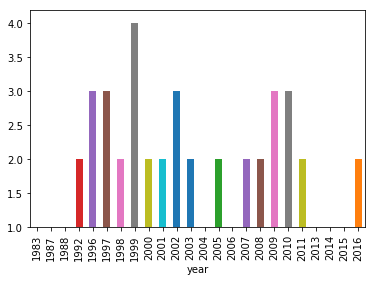

In [16]:
c.groupby(by='year').size().plot(kind='bar', ylim=1)

In [17]:
c.groupby(by=c.year//10*10).size()

year
1980     3
1990    14
2000    20
2010    10
dtype: int64

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

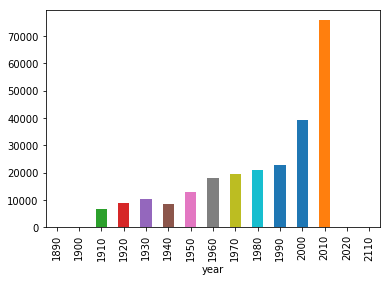

In [18]:
titles.groupby(titles.year//10*10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

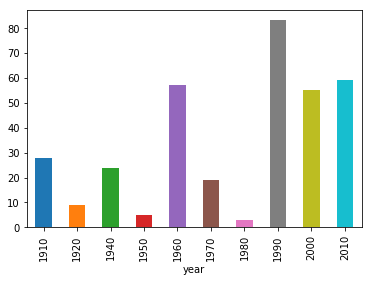

In [19]:
c = cast
c = c[c.title=='Hamlet']
c.groupby(c.year//10*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [20]:
c = cast
c = c[(c.year//10 == 195) & (c.n==1)]
c.groupby(by=['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [21]:
c = cast
c = c[(c.year//10 == 195) & (c.n <= 5)]
c.groupby(by=['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [22]:
c = cast
c = c[c.title == 'The Pink Panther']
c.groupby(by='year').n.max()

year
1963    15.0
2006    50.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [23]:
c = cast
c = c[c.name=='Frank Oz']
g = c.groupby(by=['year']).size()
g[g > 1]

year
1979    8
1980    2
1981    8
1982    2
1983    3
1984    7
1985    4
1992    8
1996    4
1999    8
2005    2
2015    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [24]:
c = cast
c = c[c.name=='Frank Oz']
g = c.groupby(by='character').size()
g[g>=2].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

### Unstacking for side-by-side comparison

In [32]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character=='Oscar the Grouch')]
g = c.groupby(['character', c.year//10*10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [33]:
g.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [36]:
u = g.unstack(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [37]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    NaN
1980    2.0
1990    1.0
2000    0.0
2010    NaN
dtype: float64